# ALGORITMOS GENÉTICOS


# Ejercicio 1.1

Encontrar, usando el método de AGs, la raíz real del polinomio P(x) = 5x5- 3x4-x3-5x2-x-3 en el
intervalo [0.5 1], usando números reales, una población de 100 listas, un solo tipo de cruce y
selección por clasificación. Dibuje un cuadro de aptitud contra generación.

Raíz estimada: 0.9348481553761944


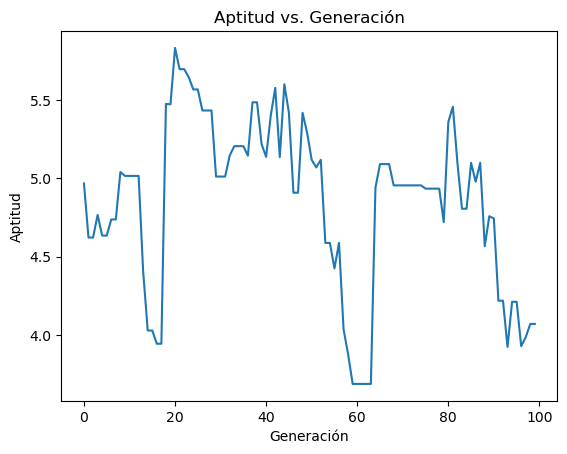

In [1]:
import random
import matplotlib.pyplot as plt

# Definir la función polinómica P(x)
def polynomial(x):
    return 5 * x**5 - 3 * x**4 - x**3 - 5 * x**2 - x - 3

# Definir la función de aptitud (cuanto más cerca de 0, mejor)
def fitness_function(solution):
    x = solution[0]
    return abs(polynomial(x))

# Inicializar parámetros
population_size = 100
mutation_rate = 0.1
num_generations = 100

# Definir el rango para la población inicial
lower_bound = 0.5
upper_bound = 1.0

# Inicializar la población con soluciones aleatorias
population = [[random.uniform(lower_bound, upper_bound)] for _ in range(population_size)]

# Inicialice listas para almacenar los mejores datos de generación y estado físico
best_fitness_values = []
generation_numbers = []

# Método de Algoritmo Genético
for generation in range(num_generations):
    # Calcular la aptitud para cada solución en la población
    fitness_scores = [fitness_function(solution) for solution in population]
    
    # Encuentra el índice de la mejor solución
    best_solution_index = fitness_scores.index(min(fitness_scores))
    
    # Almacene el mejor número de generación y estado físico
    best_fitness_values.append(fitness_scores[best_solution_index])
    generation_numbers.append(generation)
    
    # Seleccione la mitad superior de la población según su condición física.
    selected_population = population[:population_size//2]
    
    # Crear una nueva población mediante el cruce
    new_population = []
    while len(new_population) < population_size:
        parent1 = random.choice(selected_population)
        parent2 = random.choice(selected_population)
        
        # Realizar cruce de un solo punto
        crossover_point = random.randint(0, len(parent1) - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        
        # Realizar mutación con cierta probabilidad
        if random.random() < mutation_rate:
            mutation_value = random.uniform(-0.1, 0.1)
            child[0] += mutation_value
        
        new_population.append(child)
    
    # Actualizar la población con la nueva población
    population = new_population

# Encuentra la mejor solución en la población final
best_solution = population[best_solution_index]
root = best_solution[0]

# Imprime la raíz estimada
print(f"Raíz estimada: {root}")

# Plot the fitness versus generation chart
plt.plot(generation_numbers, best_fitness_values)
plt.xlabel('Generación')
plt.ylabel('Aptitud')
plt.title('Aptitud vs. Generación')
plt.show()


# Ejercicio 1.2

Suponga que tiene una lista de 15 alimentos con número de calorías, gramos de proteína,
gramos de grasa y gramos de carbohidratos. Suponga que un individuo debe consumir determinada
cantidad de calorías, proteínas, grasa y carbohidratos. Genere una dieta para ese individuo

In [6]:
import random

# Definir la lista de alimentos con su información nutricional [calorías, proteínas, grasas, carbohidratos]
foods = [
    ["Food1", 200, 10, 5, 30],
    ["Food2", 300, 15, 10, 40],
    ["Food3", 250, 12, 8, 35],
    ["Food4", 350, 20, 5, 40],
    ["Food5", 200, 12, 8, 35],
]

# Definir los requerimientos nutricionales objetivo [calorías, proteínas, grasas, carbohidratos]
target_requirements = [2000, 100, 70, 300]

# Parámetros de algoritmo genético
population_size = 100
generations = 100
mutation_rate = 0.1

# Generar una población inicial aleatoria
def generate_individual():
    return [random.choice(foods) for _ in range(len(foods))]

def fitness(individual):
    total_calories = sum(food[1] for food in individual)
    total_protein = sum(food[2] for food in individual)
    total_fat = sum(food[3] for food in individual)
    total_carbs = sum(food[4] for food in individual)

    # Calcule la aptitud como la suma ponderada de las diferencias con respecto a los requisitos objetivo
    calorie_diff = abs(total_calories - target_requirements[0])
    protein_diff = abs(total_protein - target_requirements[1])
    fat_diff = abs(total_fat - target_requirements[2])
    carb_diff = abs(total_carbs - target_requirements[3])

    # Puedes ajustar los pesos según la importancia de cada nutriente
    fitness_value = 0.4 * calorie_diff + 0.3 * protein_diff + 0.2 * fat_diff + 0.1 * carb_diff

    return fitness_value

def select_parents(population):
    # Utilice la selección de torneo para seleccionar dos padres
    parent1, parent2 = random.sample(population, 2)
    return parent1, parent2

def crossover(parent1, parent2):
    # Realizar un cruce de punto único para crear dos hijos
    crossover_point = random.randint(1, len(foods) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual):
    # Aplicar mutación reemplazando un alimento aleatorio en el individuo
    mutation_point = random.randint(0, len(foods) - 1)
    individual[mutation_point] = random.choice(foods)
    return individual

# Algoritmo genético principal
population = [generate_individual() for _ in range(population_size)]

for generation in range(generations):
    population = sorted(population, key=lambda x: fitness(x))
    best_individual = population[0]
    print(f"Generation {generation + 1}: Best Fitness = {fitness(best_individual)}")

    # Crear una nueva población
    new_population = []

    # Elitismo: conservar al mejor individuo de la generación anterior
    new_population.append(best_individual)

    # Generar descendencia mediante selección, cruce y mutación
    while len(new_population) < population_size:
        parent1, parent2 = select_parents(population)
        child1, child2 = crossover(parent1, parent2)

        if random.random() < mutation_rate:
            child1 = mutate(child1)
        if random.random() < mutation_rate:
            child2 = mutate(child2)

        new_population.extend([child1, child2])

    # Reemplazar la población antigua con la nueva población
    population = new_population

best_individual = population[0]
print("\nBest Diet Plan:")
for food in best_individual:
    print(f"{food[0]} - Calorías: {food[1]}, Proteínas: {food[2]}, Grasas: {food[3]}, Carbohidratos: {food[4]}")

total_calories = sum(food[1] for food in best_individual)
total_protein = sum(food[2] for food in best_individual)
total_fat = sum(food[3] for food in best_individual)
total_carbs = sum(food[4] for food in best_individual)
print(f"Calorías Totales: {total_calories}, Proteínas: {total_protein}, Grasas: {total_fat}, Carbohidratos: {total_carbs}")


Generation 1: Best Fitness = 181.8
Generation 2: Best Fitness = 139.5
Generation 3: Best Fitness = 139.5
Generation 4: Best Fitness = 139.5
Generation 5: Best Fitness = 139.5
Generation 6: Best Fitness = 139.5
Generation 7: Best Fitness = 139.5
Generation 8: Best Fitness = 139.5
Generation 9: Best Fitness = 139.5
Generation 10: Best Fitness = 139.5
Generation 11: Best Fitness = 139.5
Generation 12: Best Fitness = 139.5
Generation 13: Best Fitness = 139.5
Generation 14: Best Fitness = 139.5
Generation 15: Best Fitness = 139.5
Generation 16: Best Fitness = 139.5
Generation 17: Best Fitness = 139.5
Generation 18: Best Fitness = 139.5
Generation 19: Best Fitness = 119.0
Generation 20: Best Fitness = 119.0
Generation 21: Best Fitness = 119.0
Generation 22: Best Fitness = 119.0
Generation 23: Best Fitness = 119.0
Generation 24: Best Fitness = 119.0
Generation 25: Best Fitness = 119.0
Generation 26: Best Fitness = 119.0
Generation 27: Best Fitness = 119.0
Generation 28: Best Fitness = 119.0
G

# Ejercicio 2

In [18]:
import random

# Definir el número de plantas de generación y ciudades
num_plants = 4
num_cities = 4

# Definir la capacidad de cada planta de generación (en GW)
plant_capacity = [3, 6, 5, 4]

# Definir la demanda energética diaria de cada ciudad (en GW)
city_demand = [4, 3, 5, 3]

# Definir la matriz de costos de transporte (costo en GW por unidad de distancia)
transportation_cost = [
    [1.0, 4.0, 3.0, 6.0],  # Cali
    [4.0, 1.0, 4.0, 5.0],  # Bogotá
    [3.0, 4.0, 1.0, 4.0],  # Medellín
    [6.0, 5.0, 4.0, 1.0]   # Barranquilla
]

# Definir los costos de KW-H por generador (por GW) para cada planta
generation_costs = [680, 720, 660, 750]

# Prámetros de algoritmo genético
population_size = 100
num_generations = 100
crossover_rate = 0.7
mutation_rate = 0.1
alpha = 0.5  # Factor de ponderación del costo de transporte
beta = 0.5   # Factor de ponderación del coste de generación

# Inicializar la población
def initialize_population():
    population = []
    for _ in range(population_size):
        chromosome = [[random.uniform(0, plant_capacity[i]) for j in range(num_cities)] for i in range(num_plants)]
        population.append(chromosome)
    return population

# Calcular la aptitud de un cromosoma
def calculate_fitness(chromosome):
    total_transportation_cost = sum(
        sum(transportation_cost[i][j] * chromosome[i][j] for j in range(num_cities))
        for i in range(num_plants)
    )
    total_generation_cost = sum(
        sum(generation_costs[i] * chromosome[i][j] for j in range(num_cities))
        for i in range(num_plants)
    )
    return alpha * total_transportation_cost + beta * total_generation_cost

# Seleccionar padres usando la selección de la ruleta
def select_parents(population):
    fitness_values = [1 / (calculate_fitness(chromosome) + 1e-10) for chromosome in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    parents = random.choices(population, probabilities, k=2)
    return parents

# Aplicar cruce de un punto
def crossover(parent1, parent2):
    crossover_point = random.randint(1, num_cities - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Aplicar mutación
def mutate(chromosome):
    for i in range(num_plants):
        for j in range(num_cities):
            if random.random() < mutation_rate:
                chromosome[i][j] = random.uniform(0, plant_capacity[i])
    return chromosome

# Algorítmo genético principal
def genetic_algorithm():
    population = initialize_population()
    for generation in range(num_generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
    best_chromosome = min(population, key=calculate_fitness)
    return best_chromosome

# Ejecute el algoritmo genético
best_dispatch = genetic_algorithm()

# Imprima el mejor despacho de energía
print("Mejor despacho de energía:")
for i in range(num_plants):
    for j in range(num_cities):
        print(f"Plant {i+1} to City {j+1}: {best_dispatch[i][j]} GW")
        


Mejor despacho de energía:
Plant 1 to City 1: 2.308786209870399 GW
Plant 1 to City 2: 1.2614962742275715 GW
Plant 1 to City 3: 0.06538852905968084 GW
Plant 1 to City 4: 0.8155160558241543 GW
Plant 2 to City 1: 4.830584018825407 GW
Plant 2 to City 2: 0.6475798553539793 GW
Plant 2 to City 3: 0.9044315056136296 GW
Plant 2 to City 4: 0.1616307901221441 GW
Plant 3 to City 1: 2.4879638409733733 GW
Plant 3 to City 2: 4.636731965956239 GW
Plant 3 to City 3: 0.33033335011755816 GW
Plant 3 to City 4: 2.994138172264437 GW
Plant 4 to City 1: 1.4715345422100192 GW
Plant 4 to City 2: 0.6117897242302428 GW
Plant 4 to City 3: 2.0122194287441633 GW
Plant 4 to City 4: 0.7853006369942093 GW
